# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [208]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [172]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [174]:
print(websites.head())  
print(websites.info()) 

       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1       

In [4]:
#Integer columns: URL_LENGTH, NUMBER_SPECIAL_CHARACTERS and others
#Float columns: CONTENT_LENGTH, DNS_QUERY_TIMES.
#Object columns: URL, CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE.
#all columns have features less Type, this column make a difference between malicious and benign websites

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

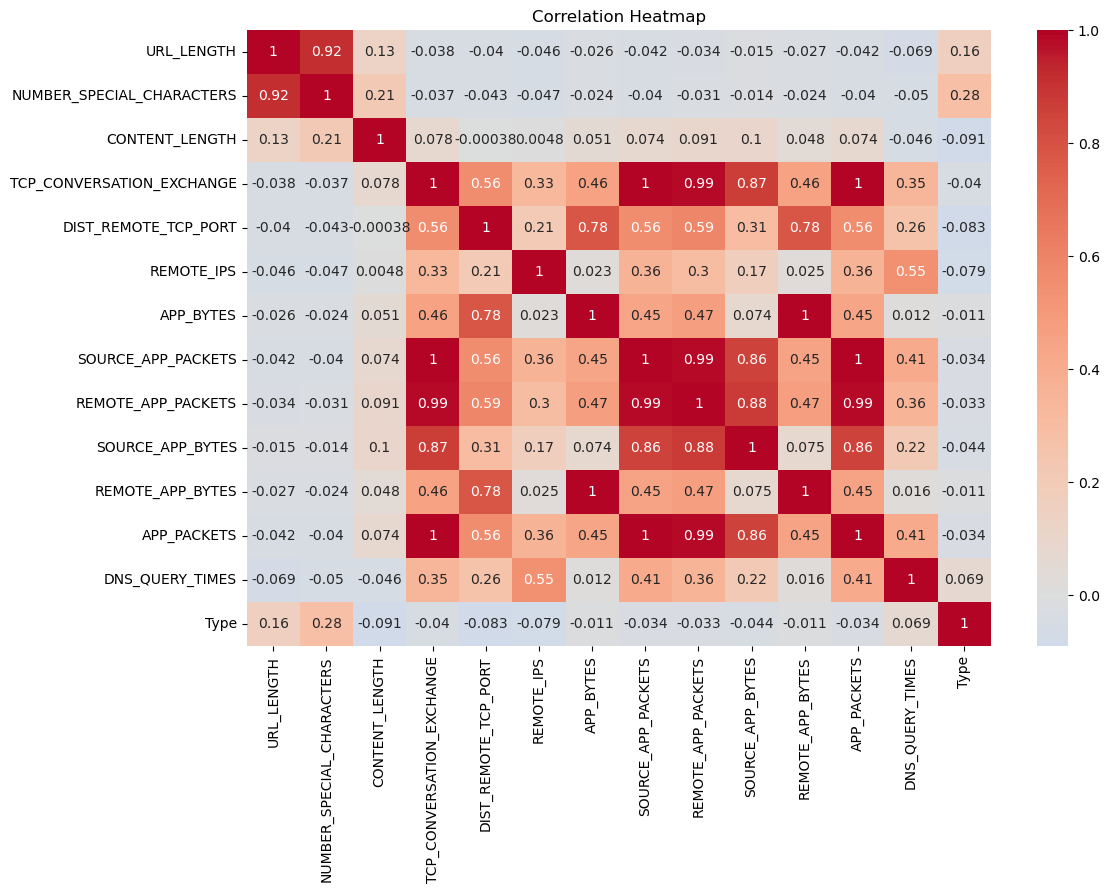

In [176]:
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = websites[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# i think that remote_app-packets, source_app_packets and app_packets are the 3 with more Collinearity

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

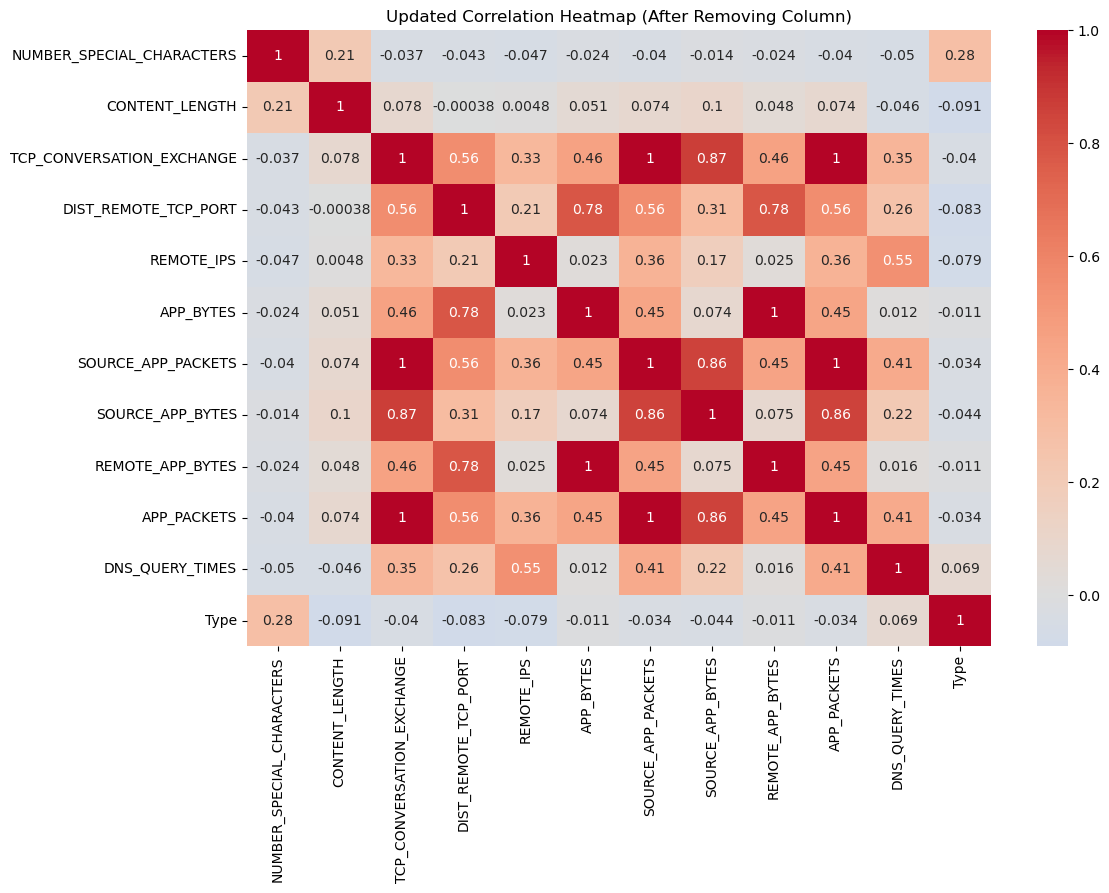

In [181]:
column_to_remove = 'URL_LENGTH'
numeric_columns = numeric_columns.drop(column_to_remove)
correlation_matrix_new = websites[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', center=0)
plt.title('Updated Correlation Heatmap (After Removing Column)')
plt.show()

In [8]:
# First i remove remote_app_packets and i see a good balance after this process, Second i remove url_length and all features dont have collinearity over 90

In [9]:
# heatmap above


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [182]:
missing_values = websites.isnull().sum()
print(missing_values)

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [183]:
missing_threshold = 0.5  

columns_to_drop = []
for column in websites.columns:
    missing_ratio = websites[column].isnull().mean()
    if missing_ratio > missing_threshold:
        columns_to_drop.append(column)


websites = websites.drop(columns=columns_to_drop, axis=1)


websites = websites.dropna()

print(websites.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        967 non-null    object 
 1   URL_LENGTH                 967 non-null    int64  
 2   NUMBER_SPECIAL_CHARACTERS  967 non-null    int64  
 3   CHARSET                    967 non-null    object 
 4   SERVER                     967 non-null    object 
 5   CONTENT_LENGTH             967 non-null    float64
 6   WHOIS_COUNTRY              967 non-null    object 
 7   WHOIS_STATEPRO             967 non-null    object 
 8   WHOIS_REGDATE              967 non-null    object 
 9   WHOIS_UPDATED_DATE         967 non-null    object 
 10  TCP_CONVERSATION_EXCHANGE  967 non-null    int64  
 11  DIST_REMOTE_TCP_PORT       967 non-null    int64  
 12  REMOTE_IPS                 967 non-null    int64  
 13  APP_BYTES                  967 non-null    int64 

In [12]:
#This process helps to mitigating the impact of missing values on the results.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [185]:
missing_values_after_cleaning = websites.isnull().sum()
print(missing_values_after_cleaning)

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [187]:
unique_countries = websites['WHOIS_COUNTRY'].unique()
print("Unique WHOIS_COUNTRY values before consolidation:\n", unique_countries)


country_mapping = {
    'CY': 'Cyprus',
    'us': 'US',
    'se': 'SE',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB'
}

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(country_mapping)


websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('Cyprus', 'CY')

unique_countries_after = websites['WHOIS_COUNTRY'].unique()
print("\nUnique WHOIS_COUNTRY values after consolidation:\n", unique_countries_after)

Unique WHOIS_COUNTRY values before consolidation:
 ['None' 'US' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'UG' 'JP' 'SI' 'IL'
 'AT' 'CN' 'BE' 'NO' 'TR' 'KY' 'BR' 'SC' 'NL' 'FR' 'CZ' 'KR' 'UA' 'CH'
 'HK' 'DE' 'IT' 'BS' 'Cyprus' 'BY' 'AE' 'IE' 'PH' 'UY']

Unique WHOIS_COUNTRY values after consolidation:
 ['None' 'US' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'UG' 'JP' 'SI' 'IL'
 'AT' 'CN' 'BE' 'NO' 'TR' 'KY' 'BR' 'SC' 'NL' 'FR' 'CZ' 'KR' 'UA' 'CH'
 'HK' 'DE' 'IT' 'BS' 'CY' 'BY' 'AE' 'IE' 'PH' 'UY']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

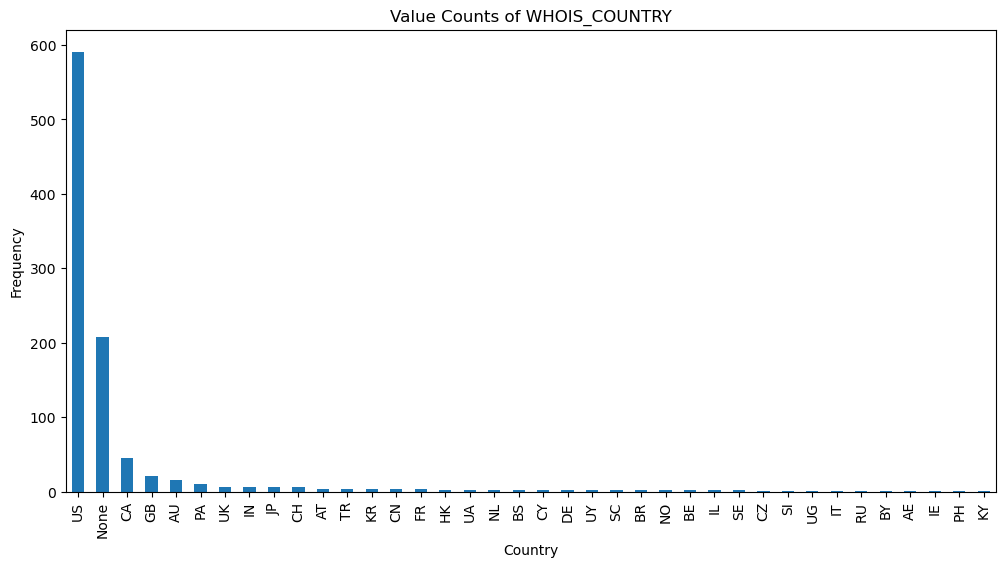

In [188]:
plt.figure(figsize=(12, 6))
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar')
plt.title('Value Counts of WHOIS_COUNTRY')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [189]:
top_countries = websites['WHOIS_COUNTRY'].value_counts().head(10).index
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries else 'OTHER')
print(websites['WHOIS_COUNTRY'].value_counts())

US       591
None     208
OTHER     52
CA        45
GB        21
AU        16
PA        10
UK         6
IN         6
JP         6
CH         6
Name: WHOIS_COUNTRY, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [190]:
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites = websites.drop(columns=columns_to_drop)
print(websites.head())

       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY  \
0                  nginx           263.0          None   
1          Apache/2.4.10         15087.0          None   
2  Microsoft-HTTPAPI/2.0           324.0          None   
3                  nginx           162.0            US   
4                   None        124140.0            US   

   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                          7                     0           2        700   
1                         17                     7           4       1230   
2                          0 

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [191]:
categorical_columns = ['URL', 'CHARSET', 'SERVER']
data_types = websites[categorical_columns].dtypes
print(data_types)

URL        object
CHARSET    object
SERVER     object
dtype: object


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [192]:
websites = websites.drop(columns=['URL'])
print(websites.head())

   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET                 SERVER  \
0          16                          7  iso-8859-1                  nginx   
1          16                          6       UTF-8          Apache/2.4.10   
2          16                          6    us-ascii  Microsoft-HTTPAPI/2.0   
3          17                          6  ISO-8859-1                  nginx   
4          17                          6       UTF-8                   None   

   CONTENT_LENGTH WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  \
0           263.0          None                          7   
1         15087.0          None                         17   
2           324.0          None                          0   
3           162.0            US                         31   
4        124140.0            US                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1           

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [193]:
charset_value_counts = websites['CHARSET'].value_counts()
print(charset_value_counts)

UTF-8           287
ISO-8859-1      257
utf-8           161
us-ascii        146
iso-8859-1      110
None              4
windows-1251      1
ISO-8859          1
Name: CHARSET, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [194]:
unique_server_values = websites['SERVER'].unique()
print(unique_server_values)

['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' 'None' 'Apache/2'
 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)' 'Apache'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'nginx/1.6.2' 'Heptu web server'
 'Microsoft-IIS/7.5' 'nginx/1.12.0'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4' 'tsa_c'
 'Apache/2.2.22 (Debian)' 'Apache/2.4.25'
 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips' 'Apache/2.2.22 (Ubuntu)'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.6 (CentOS) PHP/5.6.8' 'AmazonS3' 'ATS'
 'Apache/2.2.27 (CentOS)' 'CherryPy/3.6.0' 'Apache/2.2.15 (CentOS)' 'KHL'
 'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40'
 'Apache/2.2.3 (CentOS)' 'Apache/2.4' 'Apache/2.2.31 (

![Think Hard](../images/think-hard.jpg)

In [24]:
#group servers with similar characteristics (for example the same name)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [195]:
server_mapping = {
    'Microsoft': 'Microsoft',
    'Apache': 'Apache',
    'nginx': 'nginx'
}

def map_server_type(server_name):
    for substring, server_type in server_mapping.items():
        if substring.lower() in server_name.lower():
            return server_type
    return 'Other'

websites['SERVER_TYPE'] = websites['SERVER'].apply(map_server_type)

websites = websites.drop(columns=['SERVER'])


In [196]:
# Count `SERVER` value counts here

print(websites['SERVER_TYPE'].value_counts())

Apache       401
Other        220
Microsoft    180
nginx        166
Name: SERVER_TYPE, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [197]:
categorical_columns = ['CHARSET', 'WHOIS_COUNTRY', 'SERVER_TYPE']
website_dummy = pd.get_dummies(websites, columns=categorical_columns)
print(website_dummy.head())

   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
0          16                          7           263.0   
1          16                          6         15087.0   
2          16                          6           324.0   
3          17                          6           162.0   
4          17                          6        124140.0   

   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                          7                     0           2        700   
1                         17                     7           4       1230   
2                          0                     0           0          0   
3                         31                    22           3       3812   
4                         57                     2           5       4278   

   SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...  \
0                   9                  10              1153  ...   
1                  17                  1

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [199]:
website_dummy.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_None,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US,SERVER_TYPE_Apache,SERVER_TYPE_Microsoft,SERVER_TYPE_Other,SERVER_TYPE_nginx
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,9.670000e+02,...,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,55.560496,10.808687,11733.697001,16.964840,3.469493,3.188211,1720.409514,19.352637,19.382627,1.702195e+04,...,0.006205,0.215098,0.053775,0.010341,0.006205,0.611169,0.414685,0.186143,0.227508,0.171665
std,25.572456,4.124311,36429.131522,45.139866,6.889008,3.369843,3925.800938,46.072438,50.036140,7.942383e+04,...,0.078566,0.411103,0.225689,0.101217,0.078566,0.487737,0.492922,0.389423,0.419440,0.377284
min,16.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,8.000000,0.000000,2.000000,762.000000,10.000000,10.000000,8.220000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,66.500000,12.000000,11324.500000,22.000000,4.000000,5.000000,2332.500000,26.000000,25.000000,9.382000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,58.000000,17.000000,99843.000000,1198.000000,1284.000000,2.060012e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [201]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop('Type', axis=1)  
y = website_dummy['Type']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (773, 36)
X_test shape: (194, 36)
y_train shape: (773,)
y_test shape: (194,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [212]:
logreg_model = LogisticRegression(max_iter=1000)  

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [213]:
logreg_model.fit(X_train, y_train)

/Users/barbaragdias/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [214]:
y_pred = logreg_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[172   3]
 [  6  13]]
Accuracy: 0.9536082474226805


What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# True Positive: 13
#True Negative: 172
#False Positive: 3
#False Negative: 6
#the model correctly predicted the class of 95.36% of the websites

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [216]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Confusion Matrix:
[[168   7]
 [  6  13]]
Accuracy: 0.9329896907216495


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [217]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Confusion Matrix:
[[168   7]
 [  7  12]]
Accuracy: 0.9278350515463918


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
#In this case, increasing k did not lead to an improvement in the accuracy score.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [218]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = logreg_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
confusion_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Confusion Matrix (Scaled):\n", confusion_matrix_scaled)
print("Accuracy (Scaled):", accuracy_scaled)

Confusion Matrix (Scaled):
 [[170   5]
 [  9  10]]
Accuracy (Scaled): 0.9278350515463918
